# Computing algorithm's perfomance 

#### Import packages

In [265]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from scipy import stats

#### Read data

In [86]:
# [:,1:] -> this sulfix was used to skip the first column
reference_data = np.genfromtxt("../../../../data/survey_macrozones_freqs.csv", skip_header=True, delimiter=",")[:,1:]
all_est_data = np.genfromtxt("../../../../data/all_est_macrozones_freqs.csv", skip_header=True, delimiter=",")[:,1:]
may_est_data = np.genfromtxt("../../../../data/may_est_macrozones_freqs.csv", skip_header=True, delimiter=",")[:,1:]
wday_est_data = np.genfromtxt("../../../../data/wday_est_macrozones_freqs.csv", skip_header=True, delimiter=",")[:,1:]

#### Normalize data
The algorithms were evaluated in a bigger test subset than the survey subset. So, to a fair comparison, is appropriate to use the same number of items (Aka normalize) in test subset to compare the different algorithms.

In [94]:
def get_balanced_matrix(ref, src):
    return np.round(src.T/((np.sum(src, axis=1)/np.sum(ref, axis=1)))).T

all_est_data = get_balanced_matrix(reference_data, all_est_data)
may_est_data = get_balanced_matrix(reference_data, may_est_data)
wday_est_data = get_balanced_matrix(reference_data, wday_est_data)

#### Compute True Positive and False Positive metrics
In this evaluation, we will compute the number of True Positives (TP) and False Positives (FP) for each macro zone for all algorithms and compare their performance.

In [111]:
def get_scores(src, ref):
    tp = fp = np.array([])
    for r_src, r_ref in zip(src, ref):
        high_pos = r_ref > r_src
        r_fp = np.sum(r_ref[high_pos] - r_src[high_pos])
        fp = np.append(fp, r_fp)
        tp = np.append(tp, np.sum(r_src)-r_fp)
    return tp, fp

tp_all, fp_all = get_scores(reference_data, all_est_data)
tp_may, fp_may = get_scores(reference_data, may_est_data)
tp_wday, fp_wday = get_scores(reference_data, wday_est_data)

#### Compute Precision or Positive Predictive Value (PPV)

In [143]:
display(Math(r'PPV = \frac{TP}{TP+FP}'))
def get_precision(tp, fp):
    return tp/(tp+fp)

def get_precision_global(tp, fp):
    tp = np.sum(tp)
    fp = np.sum(fp)
    return get_precision(tp, fp)

<IPython.core.display.Math object>

#### Precision global
Small difference between these values.

In [248]:
ppv_all_global = get_precision_global(tp_all, fp_all)
ppv_may_global = get_precision_global(tp_may, fp_may)
ppv_wday_global = get_precision_global(tp_wday, fp_wday)

print(ppv_all_global)
print(ppv_may_global)
print(ppv_wday_global)

0.8649870179824983
0.8673910952976248
0.865948648908549


#### Precision for macro zone

In [185]:
ppv_all = get_precision(tp_all, fp_all)
ppv_may = get_precision(tp_may, fp_may)
ppv_wday = get_precision(tp_wday, fp_wday)

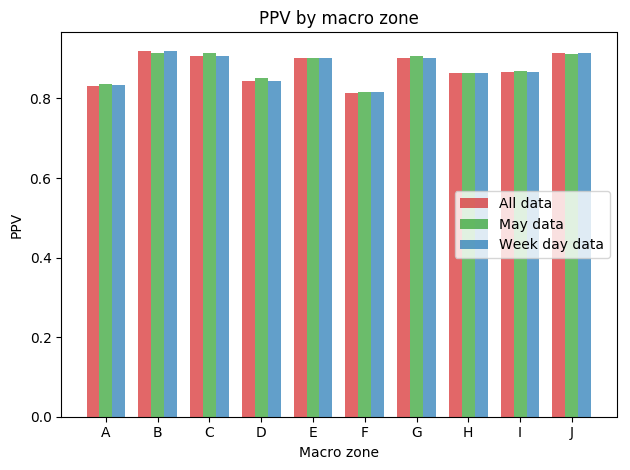

In [263]:
n_groups = ppv_all.size

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.7
 
rects1 = plt.bar(index, ppv_all, bar_width,
                 alpha=opacity, color='tab:red', label='All data')
 
rects2 = plt.bar(index + bar_width, ppv_may, bar_width,
                 alpha=opacity, color='tab:green', label='May data')
 
rects3 = plt.bar(index + (2*bar_width), ppv_wday, bar_width,
                 alpha=opacity, color='tab:blue', label='Week day data')
 
plt.xlabel('Macro zone')
plt.ylabel('PPV')
plt.title('PPV by macro zone')
plt.xticks(index+bar_width, ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'))
plt.legend(loc=5)
 
plt.tight_layout()
plt.show()

In [266]:
stats.kruskal(ppv_all, ppv_may, ppv_wday)

KruskalResult(statistic=0.08342997323817555, pvalue=0.9591431102399561)

In this experiment, we can conclude that has no statistical difference between the algorithms tested.